In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# Define Input Parameters
input_size = (150, 150)
channel = (3, )
input_shape = input_size + channel

#batch size
batch_size = 16

#Epoch
epoch = 10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/basedata/Train',
                                                    target_size=input_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/basedata/Test',
                                                target_size=input_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/basedata/Validation',
                                                  target_size=input_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)
num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 12 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
print(labels)

dict_keys(['Asli', 'Palsu'])


In [ ]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [ ]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

# Compile the model
print('Compiling Model.......OK MANTAP')
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Compiling Model.......OK MANTAP


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 activation_6 (Activation)   (None, 150, 150, 128)     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      36896     
                                                                 
 activation_7 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 32)        0         
                                                      

Train Model

In [ ]:
EPOCH = 20

In [ ]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator),
        shuffle=True,
        verbose = 1)

Epoch 1/20
1/1 [==============================] - 11s 11s/step - loss: 0.7152 - accuracy: 0.5000 - val_loss: 1.0643 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 1.6335 - accuracy: 0.5000 - val_loss: 1.1542 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 1.8510 - accuracy: 0.5833 - val_loss: 0.7308 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 0.8428 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 0.6822 - accuracy: 0.8333 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 0.6873 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 4s 4s/step - loss: 0.7024 - accuracy: 0.4167 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=======================

In [ ]:
history.history['loss']

[0.7152073979377747,
 1.6334620714187622,
 1.8510141372680664,
 0.842764139175415,
 0.6821532845497131,
 0.6872556805610657,
 0.7023975849151611,
 0.69170743227005,
 0.6871716380119324,
 0.6956165432929993,
 0.6987385749816895,
 0.6930517554283142,
 0.695950984954834,
 0.695807158946991,
 0.6911490559577942,
 0.6953168511390686,
 0.6924500465393066,
 0.6937904357910156,
 0.6933606266975403,
 0.6932888627052307]

In [ ]:
history.history['accuracy']

[0.5,
 0.5,
 0.5833333134651184,
 0.5,
 0.8333333134651184,
 0.5,
 0.4166666567325592,
 0.5,
 0.5833333134651184,
 0.4166666567325592,
 0.5833333134651184,
 0.4166666567325592,
 0.4166666567325592,
 0.5,
 0.5,
 0.25,
 0.5833333134651184,
 0.4166666567325592,
 0.5833333134651184,
 0.5]

Plot the training

In [ ]:
from matplotlib import pyplot as plt

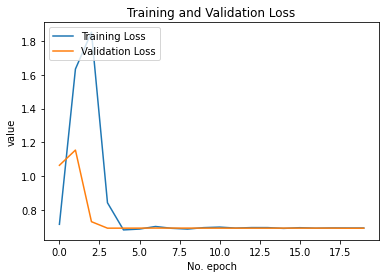

In [ ]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

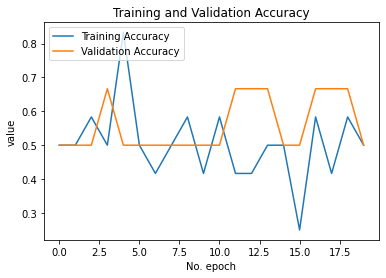

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import os

In [ ]:
import pathlib

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

42577424

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "BangTanI_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/BangTanI_project/model.h5...


Evaluate Models

In [ ]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')

loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.7500 
Loss on training data: 0.6872 

Accuracy on test data: 0.7500 
Loss on test data: 0.6872 



In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [ ]:
labels = ['Asli', 'Palsu']

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
im = Image.open('/content/drive/MyDrive/basedata/Test/Asli/NPK_asli.png')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print(labels[np.argmax(y)], np.max(y))

Asli 0.5050157


In [ ]:
im = Image.open('/content/drive/MyDrive/basedata/Test/Palsu/NPK_palsu.png')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print(labels[np.argmax(y)], np.max(y))

Palsu 0.5039077


In [ ]:
from google.colab import drive
drive.mount('/content/drive')